In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.head()

,Realised,US Financial Turbulence
Date,,
2017-11-02,0.004994,806.442547
2017-11-03,0.006088,702.337034
2017-11-06,0.001982,529.197112
2017-11-07,0.004198,512.157114
2017-11-08,0.003317,493.752126


# Hyperparameter Search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
from numpy.random import seed
from random import randrange

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
21/21 [==============================] - 6s 19ms/step - loss: 0.0077 - acc: 0.0000e+00
Epoch 2/15
21/21 [==============================] - 0s 10ms/step - loss: 0.0049 - acc: 0.0000e+00
Epoch 3/15
21/21 [==============================] - 0s 12ms/step - loss: 0.0038 - acc: 0.0000e+00
Epoch 4/15
21/21 [==============================] - 0s 11ms/step - loss: 0.0034 - acc: 0.0000e+00
Epoch 5/15
21/21 [==============================] - 0s 16ms/step - loss: 0.0032 - acc: 0.0000e+00
Epoch 6/15
21/21 [==============================] - 0s 14ms/step - loss: 0.0031 - acc: 0.0000e+00
Epoch 7/15
21/21 [==============================] - 0s 18ms/step - loss: 0.0031 - acc: 0.0000e+00
Epoch 8/15
21/21 [==============================] - 0s 10ms/step - loss: 0.0030 - acc: 0.0000e+00
Epoch 9/15
21/21 [==============================] - 0s 14ms/step - loss: 0.0029 - acc: 0.0000e+00
Epoch 10/15
21/21 [==============================] - 0s 17ms/step - loss: 0.0029 - acc: 0.0000e+00
Epoch 11/15
21/21 [

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
20/20 [==============================] - 3s 12ms/step - loss: 0.0787 - acc: 0.0000e+00
Epoch 2/3
20/20 [==============================] - 0s 10ms/step - loss: 0.0580 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 20ms/step
Epoch: 3 | Inputs: 126 | Nodes: 84 | Dropout: 0.2 | Loss: mae
RMSE: 0.003477715305122916 | Accuracy: 56.83418835437064
Epoch 1/3
21/21 [==============================] - 3s 8ms/step - loss: 0.0713 - acc: 0.0000e+00
Epoch 2/3
21/21 [==============================] - 0s 8ms/step - loss: 0.0644 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 84 | Nodes: 56 | Dropout: 0.2 | Loss: mae
RMSE: 0.0035731922818933205 | Accuracy: 61.258227000206176
Epoch 1/15
23/23 [==============================] - 3s 7ms/step - loss: 0.1294 - acc: 0.0000e+00
Epoch 2/15
23/23 [==============================] - 0s 6ms/step - loss: 0.1075 - acc: 0.0000e+00
Epoch 3/15
23/23 [==============================] - 0s 6m

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/15
20/20 [==============================] - 2s 11ms/step - loss: 0.0158 - acc: 0.0000e+00
Epoch 2/15
20/20 [==============================] - 0s 9ms/step - loss: 0.0122 - acc: 0.0000e+00
Epoch 3/15
20/20 [==============================] - 0s 9ms/step - loss: 0.0103 - acc: 0.0000e+00
Epoch 4/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0091 - acc: 0.0000e+00
Epoch 5/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0079 - acc: 0.0000e+00
Epoch 6/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0069 - acc: 0.0016
Epoch 7/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0077 - acc: 0.0000e+00
Epoch 8/15
20/20 [==============================] - 0s 8ms/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 9/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0079 - acc: 0.0000e+00
Epoch 10/15
20/20 [==============================] - 0s 7ms/step - loss: 0.0069 - acc: 0.0000e+00
Epoch 11/15
20/20 [=============

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 2
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 2s 10ms/step - loss: 0.0108 - acc: 0.0000e+00
Epoch 2/3
21/21 [==============================] - 0s 9ms/step - loss: 0.0081 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 23ms/step
Epoch: 3 | Inputs: 84 | Nodes: 168 | Dropout: 0 | Loss: mse
RMSE: 0.0038991494301004064 | Accuracy: 45.0878127677454
Epoch 1/5
21/21 [==============================] - 2s 9ms/step - loss: 0.0061 - acc: 0.0000e+00
Epoch 2/5
21/21 [==============================] - 0s 9ms/step - loss: 0.0048 - acc: 0.0000e+00
Epoch 3/5
21/21 [==============================] - 0s 8ms/step - loss: 0.0039 - acc: 0.0000e+00
Epoch 4/5
21/21 [==============================] - 0s 8ms/step - loss: 0.0035 - acc: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 22ms/step
Epoch: 5 | Inputs: 84 | Nodes: 84 | Dropout: 0.4 | Loss: huber_loss
RMSE: 0.0037795741205346976 | Accuracy: 47.14133506984564
Epoch 1/10
16/16 [==============================] - 2s 1

Epoch: 15 | Inputs: 252 | Nodes: 42 | Dropout: 0 | Loss: mae
RMSE: 0.003351876934789724 | Accuracy: 62.83044724024271

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 2
n_input = 252
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(42, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=15)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/15
24/24 [==============================] - 2s 15ms/step - loss: 0.0760 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0760
Epoch 2/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0534 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0534
Epoch 3/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0516 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0516
Epoch 4/15
24/24 [==============================] - 0s 9ms/step - loss: 0.0493 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0493
Epoch 5/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0485 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0485
Epoch 6/15
24/24 [==============================] - 0s 9ms/step - loss: 0.0481 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0481
Epoch 7/15
24/24 [==============================] - 0s 10ms/step - loss: 0.0473 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0473
Epoch 8/15
24/24 [==============================] - 0s 9ms/step - loss:

In [ ]:
RMSE

[0.0047876563877684115,
 0.004785673140408125,
 0.004844178004700582,
 0.004782188316523885,
 0.0048126218949955425,
 0.004743683753291364,
 0.004790210267762152,
 0.004749653807620045,
 0.004787986732126392,
 0.0048471304597880955]

In [ ]:
Accuracy

[71.56179564244228,
 72.67636809396987,
 72.78737634188995,
 72.1084566943165,
 72.06446280713247,
 72.72192978184228,
 69.96081657258114,
 71.92241335684548,
 73.34566690297515,
 72.75487498786735]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

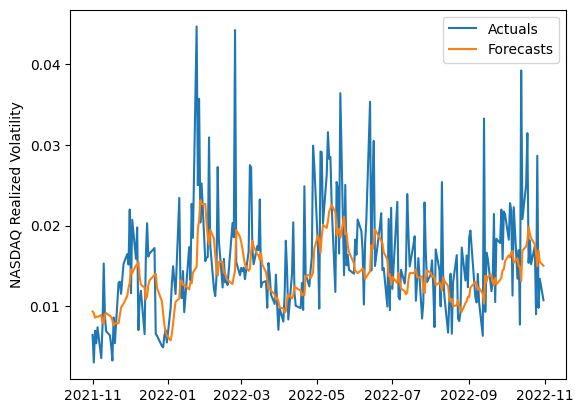

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 2 NASDAQ Forecasts.csv', index = True)